In [1]:
#############숫자 두르는 테두리 만들기 ###############

import cv2
import sys
import math
import cv2 as cv
from time import sleep
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt



import os
import glob
from PIL import Image
import numpy as np
import cv2
import math

In [44]:

#ContourImg2Bit Module

#labeling된 파일들 모두 new_X와 new_y로 변환
new_X=[]
new_y=[]


#하위파일로 data/resize/0~9 파일이 존재해야한다
os.chdir('./data/resize')
#현재 디렉토리 위치 출력
print(os.getcwd() )

for t in range(10):
#해당 Label파일에 cutting된 사진 저장 
    os.chdir(f"./{t}")
    print(os.listdir())
    files=os.listdir()        
    #for j in range(10):
    for idx, file in enumerate(files):
        fname, ext = os.path.splitext(file)
    
        #디렉토리에있는 파일중 jpg,png파일만 읽어들임
        if ext in ['.jpg','.png']:
            path=os.getcwd()
            print(path,file)
            
            #이미지 파일 하나 로딩
            name =file 
            
            img = cv2.imread(name , cv2.IMREAD_COLOR) 
            
            # 모폴로지(dilate->팽창연산 적용: 글자 잡음 제거 , erode -> 침식연산 적용 :글자 주변 잡음 제거)
            k = cv2.getStructuringElement(cv2.MORPH_RECT, (2,2)) #구조화 요소 커널, 사각형 (2x2) 생성
            ero_img = cv2.erode(img, k)

            imgray = cv2.cvtColor(ero_img, cv2.COLOR_BGR2GRAY) #이거 안하면 이진화 불가
            
            
            ret, img_binary = cv2.threshold(imgray, 127, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)  # 이진화
            

            ret, img_final_binary = cv2.threshold(imgray, 127, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)  # 원본 이진화
            
            
            vers_img = 255 - img_binary #(이미지를 반전 처리 해줌) -> 컨투어(사각형 그리기)는 흰색을 기준으로 그리기 때문

            
            contours, hierarchy = cv2.findContours(vers_img, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)  # 컨투어
            #반전된 이미지로 컨투어를 진행

            if len(contours) == 0:
                print("컨투어 0") #컨투어를 하지 못한 -> 이미지 파일 손상 등등의 문제
                x, y, w, h=0,0,28,28
                x_mid = x + w/2
                y_mid = y + h/2
            else:
                contr = contours[0]
                x, y, w, h = cv2.boundingRect(contr)  # 최소한의 사각형 그려주는 함수
                cv2.rectangle(img_binary, (x, y), (x + w, y + h), (0, 255, 0), 3) #(x,y)->왼쪽 하단 꼭지점, (x+w,y+h)-> 오른쪽 상단 꼭지점   
                # w: 사각형의 width, h: 사각형의 high  x: 왼쪽 아래 꼭지점의 x좌표  y: 오른쪽 위 꼭지점의 y좌표 
                # 사각형을 img_binary에 그려 주었다 -> 사각형 추후 처리해야 한다 아니면 숫자가 바뀜
                
                x_mid = x + w/2
                y_mid = y + h/2
                           
            final_img = [[255 for col in range(28)] for row in range(28)]
            
            cpy_img,cpy_img2 = [[255 for col in range(28)] for row in range(28)], [[255 for col in range(28)] for row in range(28)]

            

            x_er = math.floor(x_mid -14)
            y_er = math.floor(y_mid -14)
            print(x_er)
            if x_mid !=  14 : # 숫자가 좌우 쏠림
                for i in range (27):
                    for j in range (27):
                        if img_final_binary[i][j] == 0: #데이터가 있으면 
                            try:
                                cpy_img2[i][j-round(x_er)] = 0                           
                            except:
                                img_final_binary[i][j] = 0

            
            if y_mid !=  14 : # 숫자가 상하 쏠림
                for i in range (28):
                    for j in range (28):
                        if cpy_img2[j][i] == 0: #데이터가 있으면 
                            try:
                                final_img[j-round(y_er)][i] = 0   
                            except:
                                cpy_img2[j][i]=0
            else: #이미 상하정렬되어 있으면 
                for i in range (28):
                     for j in range (28):
                        final_img[i][j] = cpy_img2[i][j] #deep copy            
            
            
            
            
            
            
            
            
            
            
  
            #한픽셀 반전해서 담기
            cnt=0
            bit=[]
            for i in range(28):
                for j in range(28):
                    a=0
                    
                    
                    
                    
                    
                    a= 255-final_img[i][j]
                    #비트담기
                    if a==0:
                        cnt+=1
                    bit.append(a)
            if cnt>780:
                bit=[]
                for i in range(28):
                    for j in range(28):
                        a=0

                        a= 255-img[i][j][0]
                        #비트담기
                        bit.append(a)               
            new_X.append(bit)
            new_y.append(t)

            #모두 잘라낸뒤 resize파일로 돌아가기
    os.chdir("../")
#mnist형태인 np.array로 변환
new_X=np.array(new_X)
new_y=np.array(new_y)
#시작파일로 맞추기위해 상위파일로가기(필요 시)
os.chdir("../")
os.chdir("../")
#현재 디렉토리 위치 출력
print(os.getcwd() )

E:\전민재\전공\3학년\머신러닝\개인작업\data\resize
['Img10_0_0.jpg', 'Img10_0_1.jpg', 'Img10_0_2.jpg', 'Img10_0_3.jpg', 'Img10_0_4.jpg', 'Img10_0_5.jpg', 'Img10_0_6.jpg', 'Img10_0_7.jpg', 'Img10_0_8.jpg', 'Img10_0_9.jpg', 'Img11_0_0.jpg', 'Img11_0_1.jpg', 'Img11_0_2.jpg', 'Img11_0_3.jpg', 'Img11_0_4.jpg', 'Img11_0_5.jpg', 'Img11_0_6.jpg', 'Img11_0_7.jpg', 'Img11_0_8.jpg', 'Img11_0_9.jpg', 'Img12_0_0.jpg', 'Img12_0_1.jpg', 'Img12_0_2.jpg', 'Img12_0_3.jpg', 'Img12_0_4.jpg', 'Img12_0_5.jpg', 'Img12_0_6.jpg', 'Img12_0_7.jpg', 'Img12_0_8.jpg', 'Img12_0_9.jpg', 'Img13_0_0.jpg', 'Img13_0_1.jpg', 'Img13_0_2.jpg', 'Img13_0_3.jpg', 'Img13_0_4.jpg', 'Img13_0_5.jpg', 'Img13_0_6.jpg', 'Img13_0_7.jpg', 'Img13_0_8.jpg', 'Img13_0_9.jpg', 'Img14_0_0.jpg', 'Img14_0_1.jpg', 'Img14_0_2.jpg', 'Img14_0_3.jpg', 'Img14_0_4.jpg', 'Img14_0_5.jpg', 'Img14_0_6.jpg', 'Img14_0_7.jpg', 'Img14_0_8.jpg', 'Img14_0_9.jpg', 'Img15_0_0.jpg', 'Img15_0_1.jpg', 'Img15_0_2.jpg', 'Img15_0_3.jpg', 'Img15_0_4.jpg', 'Img15_0_5.jpg', 'Img15_0_6.

E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img18_0_8.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img18_0_9.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img19_0_0.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img19_0_1.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img19_0_2.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img19_0_3.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img19_0_4.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img19_0_5.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img19_0_6.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img19_0_7.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img19_0_8.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img19_0_9.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img20_0_0.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img20_0_1.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img20_0_2.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img20_0_3.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img20_0_4.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\0 Img20_0_5.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업

0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img11_1_3.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img11_1_4.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img11_1_5.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img11_1_6.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img11_1_7.jpg
-7
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img11_1_8.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img11_1_9.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img12_1_0.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img12_1_1.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img12_1_2.jpg
-4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img12_1_3.jpg
-4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img12_1_4.jpg
-4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img12_1_5.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img12_1_6.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img12_1_7.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img12_1_8.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img12_1_9.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img13_1_0.jpg
1
E:\전민재\전공\

E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img26_1_7.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img26_1_8.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img26_1_9.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img27_1_0.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img27_1_1.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img27_1_2.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img27_1_3.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img27_1_4.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img27_1_5.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img27_1_6.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img27_1_7.jpg
3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img27_1_8.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img27_1_9.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img28_1_0.jpg
-4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img28_1_1.jpg
-4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img28_1_2.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img28_1_3.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\1 Img28_1_4.jpg
-3
E:\전민재\전공\3학년\머신러

E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img15_2_6.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img15_2_7.jpg
3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img15_2_8.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img15_2_9.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img16_2_0.jpg
3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img16_2_1.jpg
5
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img16_2_2.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img16_2_3.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img16_2_4.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img16_2_5.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img16_2_6.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img16_2_7.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img16_2_8.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img16_2_9.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img17_2_0.jpg
3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img17_2_1.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img17_2_2.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\2 Img17_2_3.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\d

0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img11_3_0.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img11_3_1.jpg
3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img11_3_2.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img11_3_3.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img11_3_4.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img11_3_5.jpg
-5
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img11_3_6.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img11_3_7.jpg
-4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img11_3_8.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img11_3_9.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img12_3_0.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img12_3_1.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img12_3_2.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img12_3_3.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img12_3_4.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img12_3_5.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img12_3_6.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img12_3_7.jpg
-1
E:\전민재\전공\3학년

-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img26_3_8.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img26_3_9.jpg
-5
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img27_3_0.jpg
-6
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img27_3_1.jpg
-8
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img27_3_2.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img27_3_3.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img27_3_4.jpg
-5
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img27_3_5.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img27_3_6.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img27_3_7.jpg
-7
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img27_3_8.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img27_3_9.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img28_3_0.jpg
-4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img28_3_1.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img28_3_2.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img28_3_3.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img28_3_4.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\3 Img28_3_5.jpg
-2
E:\전민재\전공\

E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img16_4_1.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img16_4_2.jpg
-4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img16_4_3.jpg
-4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img16_4_4.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img16_4_5.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img16_4_6.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img16_4_7.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img16_4_8.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img16_4_9.jpg
-4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img17_4_0.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img17_4_1.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img17_4_2.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img17_4_3.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img17_4_4.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img17_4_5.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img17_4_6.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img17_4_7.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\4 Img17_4_8.jpg
-1
E:\전민재\전공\3학년\머신

2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img10_5_1.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img10_5_2.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img10_5_3.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img10_5_4.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img10_5_5.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img10_5_6.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img10_5_7.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img10_5_8.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img10_5_9.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img11_5_0.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img11_5_1.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img11_5_2.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img11_5_3.jpg
3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img11_5_4.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img11_5_5.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img11_5_6.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img11_5_7.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img11_5_8.jpg
-4
E:\전민재\전공\3학년\

E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img26_5_0.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img26_5_1.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img26_5_2.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img26_5_3.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img26_5_4.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img26_5_5.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img26_5_6.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img26_5_7.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img26_5_8.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img26_5_9.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img27_5_0.jpg
-4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img27_5_1.jpg
-4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img27_5_2.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img27_5_3.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img27_5_4.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img27_5_5.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img27_5_6.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\5 Img27_5_7.jpg
0
E:\전민재\전공\3학년\머신러닝\개

E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img14_6_8.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img14_6_9.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img15_6_0.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img15_6_1.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img15_6_2.jpg
-4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img15_6_3.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img15_6_4.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img15_6_5.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img15_6_6.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img15_6_7.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img15_6_8.jpg
-4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img15_6_9.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img16_6_0.jpg
3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img16_6_1.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img16_6_2.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img16_6_3.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img16_6_4.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\6 Img16_6_5.jpg
-3
E:\전민재\전공\3학년\머신러닝\

E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img11_7_3.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img11_7_4.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img11_7_5.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img11_7_6.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img11_7_7.jpg
-6
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img11_7_8.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img11_7_9.jpg
-4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img12_7_0.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img12_7_1.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img12_7_2.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img12_7_3.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img12_7_4.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img12_7_5.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img12_7_6.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img12_7_7.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img12_7_8.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img12_7_9.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img13_7_0.jpg
1
E:\전민재\전공\3학년\머신러닝\개인

E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img26_7_4.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img26_7_5.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img26_7_6.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img26_7_7.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img26_7_8.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img26_7_9.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img27_7_0.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img27_7_1.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img27_7_2.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img27_7_3.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img27_7_4.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img27_7_5.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img27_7_6.jpg
3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img27_7_7.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img27_7_8.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img27_7_9.jpg
3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img28_7_0.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\7 Img28_7_1.jpg
0
E:\전민재\전공\3학년\머신러닝\

E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img16_8_4.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img16_8_5.jpg
3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img16_8_6.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img16_8_7.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img16_8_8.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img16_8_9.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img17_8_0.jpg
4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img17_8_1.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img17_8_2.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img17_8_3.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img17_8_4.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img17_8_5.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img17_8_6.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img17_8_7.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img17_8_8.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img17_8_9.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img18_8_0.jpg
3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\8 Img18_8_1.jpg
3
E:\전민재\전공\3학년\머신러닝\개인

-5
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img10_9_4.jpg
-4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img10_9_5.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img10_9_6.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img10_9_7.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img10_9_8.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img10_9_9.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img11_9_0.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img11_9_1.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img11_9_2.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img11_9_3.jpg
-4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img11_9_4.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img11_9_5.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img11_9_6.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img11_9_7.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img11_9_8.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img11_9_9.jpg
-4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img12_9_0.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img12_9_1.jpg
2
E:\전민재\전공\3

E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img25_9_6.jpg
2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img25_9_7.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img25_9_8.jpg
0
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img25_9_9.jpg
1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img26_9_0.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img26_9_1.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img26_9_2.jpg
-4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img26_9_3.jpg
-6
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img26_9_4.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img26_9_5.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img26_9_6.jpg
-3
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img26_9_7.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img26_9_8.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img26_9_9.jpg
-1
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img27_9_0.jpg
-2
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img27_9_1.jpg
-5
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img27_9_2.jpg
-4
E:\전민재\전공\3학년\머신러닝\개인작업\data\resize\9 Img27_9_3.jpg
-4
E:\전민재\전공\3학년\

In [9]:
os.chdir("../")
#현재 디렉토리 위치 출력
print(os.getcwd() )

E:\전민재\전공\3학년\머신러닝\개인작업


In [46]:
(new_y[90:95])


array([0, 0, 0, 0, 0])

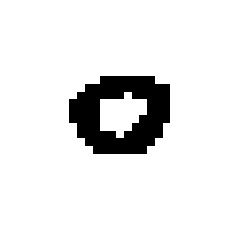

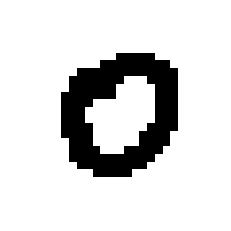

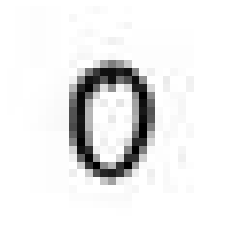

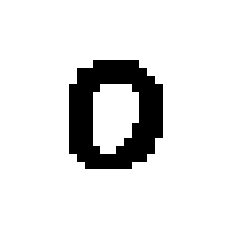

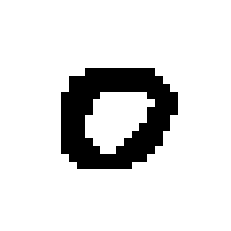

In [45]:
#확인
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
for i in new_X[90:95]:
    some_digit = i
    some_digit_image = some_digit.reshape(28, 28)
    plt.imshow(some_digit_image, cmap=mpl.cm.binary)
    plt.axis("off")

    #save_fig("some_digit_plot")
    plt.show()
